In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


#PYCARET INSTALLATION AND DATASET EXTRACTION

In [2]:
from google.colab import files
import pandas as pd
# Upload the file
uploaded = files.upload()


Saving Wholesale customers data.csv to Wholesale customers data.csv


In [3]:
filename = list(uploaded.keys())[0]
filename

'Wholesale customers data.csv'

In [4]:
p = pd.read_csv(filename)

In [5]:
p

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [6]:
from pycaret.clustering import *
hclustParameters = setup(p)

,Description,Value
0,Session id,3404
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


#WITHOUT PREPROCESSING

In [7]:
hCluster = create_model('hclust', num_clusters=3)
hCluster

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3750,183.3597,0.9783,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

AgglomerativeClustering(n_clusters=3)

In [8]:
hCluster = create_model('hclust', num_clusters=4)
hCluster

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

AgglomerativeClustering(n_clusters=4)

In [9]:
hCluster = create_model('hclust', num_clusters=5)
hCluster

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3522,196.9540,0.9106,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

AgglomerativeClustering(n_clusters=5)

In [10]:
hPred = assign_model(hCluster)
hPred

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,Cluster 0
1,2,3,7057,9810,9568,1762,3293,1776,Cluster 0
2,2,3,6353,8808,7684,2405,3516,7844,Cluster 0
3,1,3,13265,1196,4221,6404,507,1788,Cluster 0
4,2,3,22615,5410,7198,3915,1777,5185,Cluster 3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,Cluster 3
436,1,3,39228,1431,764,4510,93,2346,Cluster 1
437,2,3,14531,15488,30243,437,14841,1867,Cluster 4
438,1,3,10290,1981,2232,1038,168,2125,Cluster 0


#Plotting without preprocessing

In [14]:
plot_model(hCluster, plot='cluster')

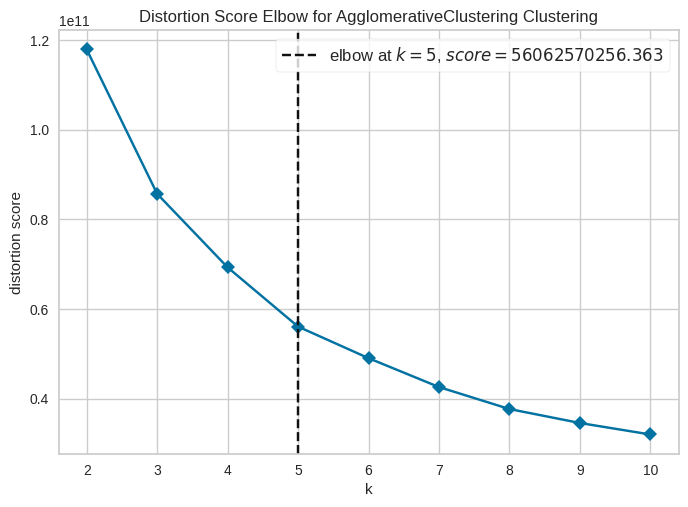

In [16]:
plot_model(hCluster, plot = 'elbow')

In [17]:
plot_model(hCluster, plot = 'tsne')

In [19]:
plot_model(hCluster, plot = 'distribution')

#DATA PREPROCESSING

NORMALISATION

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3623,120.7561,0.8255,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

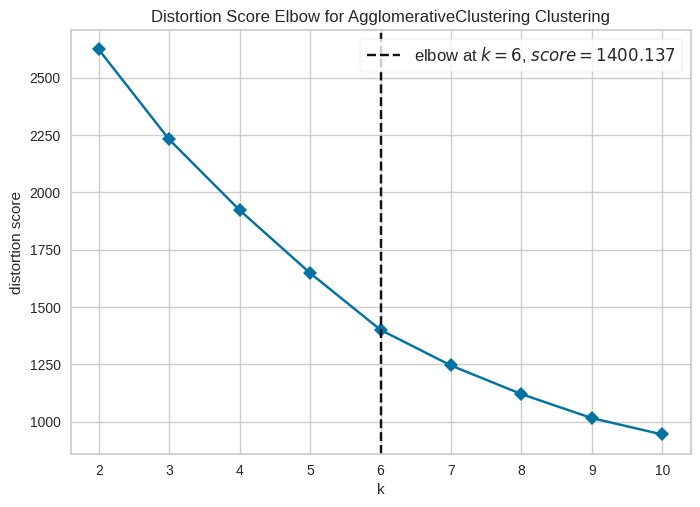

In [20]:
setup(data = p, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [24]:
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3600,126.2475,1.1551,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3623,120.7561,0.8255,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3178,123.5061,0.8960,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

#TRANSFORMATION

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5109,14291.9587,0.6054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

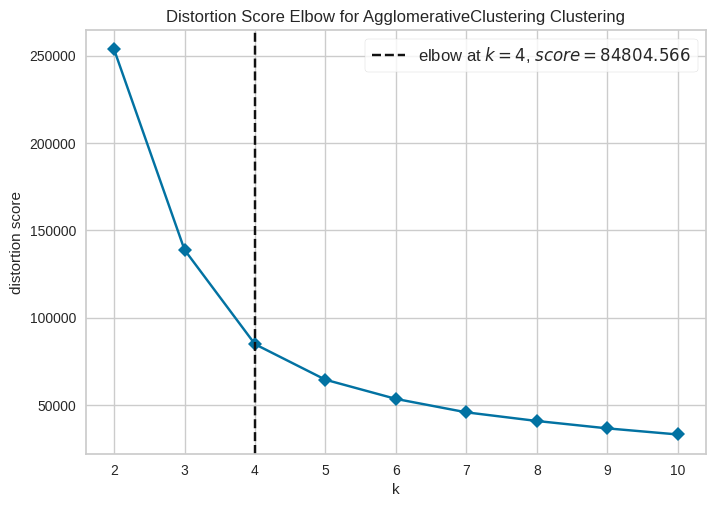

In [25]:
setup(data = p, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [26]:
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8554,13039.7633,0.3389,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5109,14291.9587,0.6054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4530,14101.6445,0.7125,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

#PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

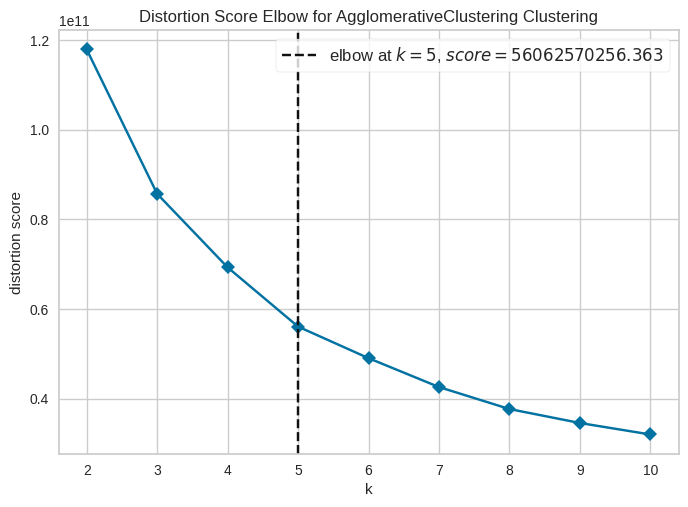

In [27]:
setup(data = p, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [28]:
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3750,183.3597,0.9783,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3522,196.9540,0.9106,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# "Transformation" + "Normalization"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

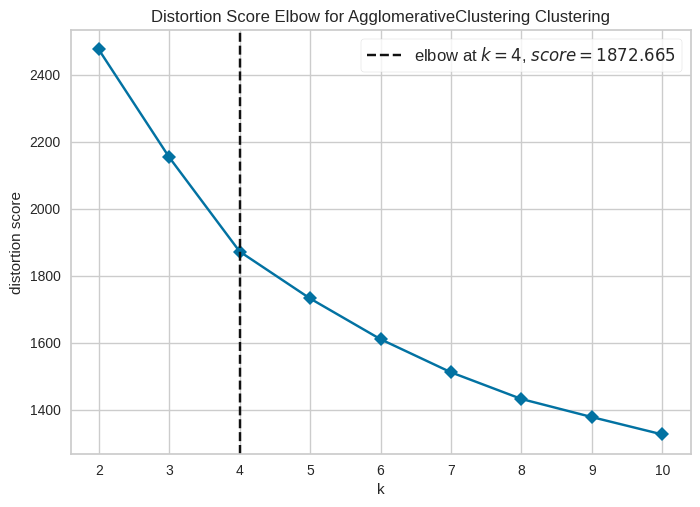

In [29]:
setup(data = p, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [30]:
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2288,138.5574,1.5189,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2073,112.2108,1.4930,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

#"Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

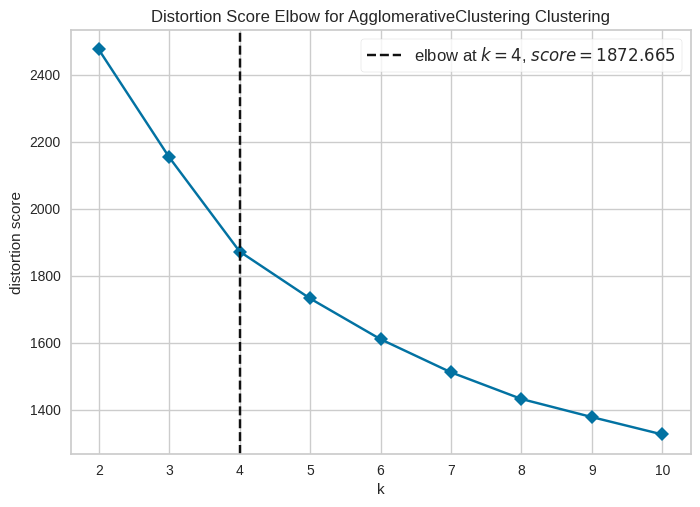

In [31]:
setup(data = p, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [32]:
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2288,138.5574,1.5189,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2073,112.2108,1.4930,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [33]:
evaluate_model(hCluster)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…